**<font color=#000000 size=5>1 Look at the Big Picture</font>**  
  
&emsp;&emsp;**<font color=#000000 size=3>1.1 Frame the Problem</font>**  
&emsp;&emsp;&emsp;&emsp;1. the objective is to use existed data to help select which city to expand to next.  
&emsp;&emsp;&emsp;&emsp;2. the model will be used to predict profits for the food truck.  
&emsp;&emsp;&emsp;&emsp;3. no current solution.  
&emsp;&emsp;&emsp;&emsp;4. the model may be supervised, batch and model-based.  
&emsp;&emsp;**<font color=#000000 size=3>1.2 Select a Performance Measure</font>**  
&emsp;&emsp;&emsp;&emsp;1. performance will be measured using RMSE.  
&emsp;&emsp;&emsp;&emsp;2. the performance measure is aligned with the business objective.  
&emsp;&emsp;&emsp;&emsp;3. the minimum performance needed to reach the business objective is that the RMSE should be small so that the predicted profit is close to the real profit.  
&emsp;&emsp;**<font color=#000000 size=3>1.3 Check the assumptions</font>**  
&emsp;&emsp;&emsp;&emsp;1. given population, the model will predict the profit. and the profit can be used to judge if that city is suitable to expand to.  
&emsp;&emsp;&emsp;&emsp;2. the assumption is feasible.  
  
&emsp;&emsp;*  
&emsp;&emsp;&emsp;&emsp;1. the task of predicting house prices is a comparable problem. and the lin reg model that task adopted can be used here.  
&emsp;&emsp;&emsp;&emsp;2. human expertise is available. there are some models made by human for predicting house prices.  
&emsp;&emsp;&emsp;&emsp;3. to manually solve the problem, I will plot data on a coordinate, draw a line to fit as many points as possible. and given data, that is, an x, see the corresponding y value, which is the predicted profit.  


**<font color=#000000 size=5>2 Get the Data</font>**

&emsp;&emsp;**<font color=#000000 size=3>2.1 Create the Workspace</font>**  
&emsp;&emsp;&emsp;&emsp;1. a work space created.  

&emsp;&emsp;**<font color=#000000 size=3>2.2 Download the Data</font>**  
&emsp;&emsp;&emsp;&emsp;1. the population of cities and profits of those cities are needed.  
&emsp;&emsp;&emsp;&emsp;2. data can be fetched from "C:\Users\Neko\Desktop\OneDrive\Python\handson-ml\datasets\ml-AW\ex-1\ex1data1.csv".  
&emsp;&emsp;&emsp;&emsp;3. the data will take about 1.34 KB.  
&emsp;&emsp;&emsp;&emsp;4. legal obligations and authorization are not needed.  
&emsp;&emsp;&emsp;&emsp;5. access authorizations are not needed.  

In [1]:
# get data

# get the data and convert it to a pd obj
import pandas as pd

def get_data(path):
    return pd.read_csv(path)

path = r"C:\Users\Neko\Desktop\OneDrive\Python\handson-ml\datasets\ml-AW\ex-1\ex1data1.csv"
ex1data1 = get_data(path)

\* pd.read_csv(path)  
path! not file data!  
  
\* path = "C:\... ..." (x)  
path = r"C:\... ..." (O)  
path = "C:/... ..."(O)  

&emsp;&emsp;&emsp;&emsp;6. the data is got.  
&emsp;&emsp;&emsp;&emsp;7. the data is converted into a pd obj for manupulation.  
&emsp;&emsp;&emsp;&emsp;8. sensitive info is not contained.  

&emsp;&emsp;**<font color=#000000 size=3>2.3 Take a Quick Look at the Data Structure
</font>**  

In [2]:
# take a look at the top 5 rows
ex1data1.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
# see info
ex1data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
# see info of numerical attrs
ex1data1.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4837FEDA0>,
      dtype=object)

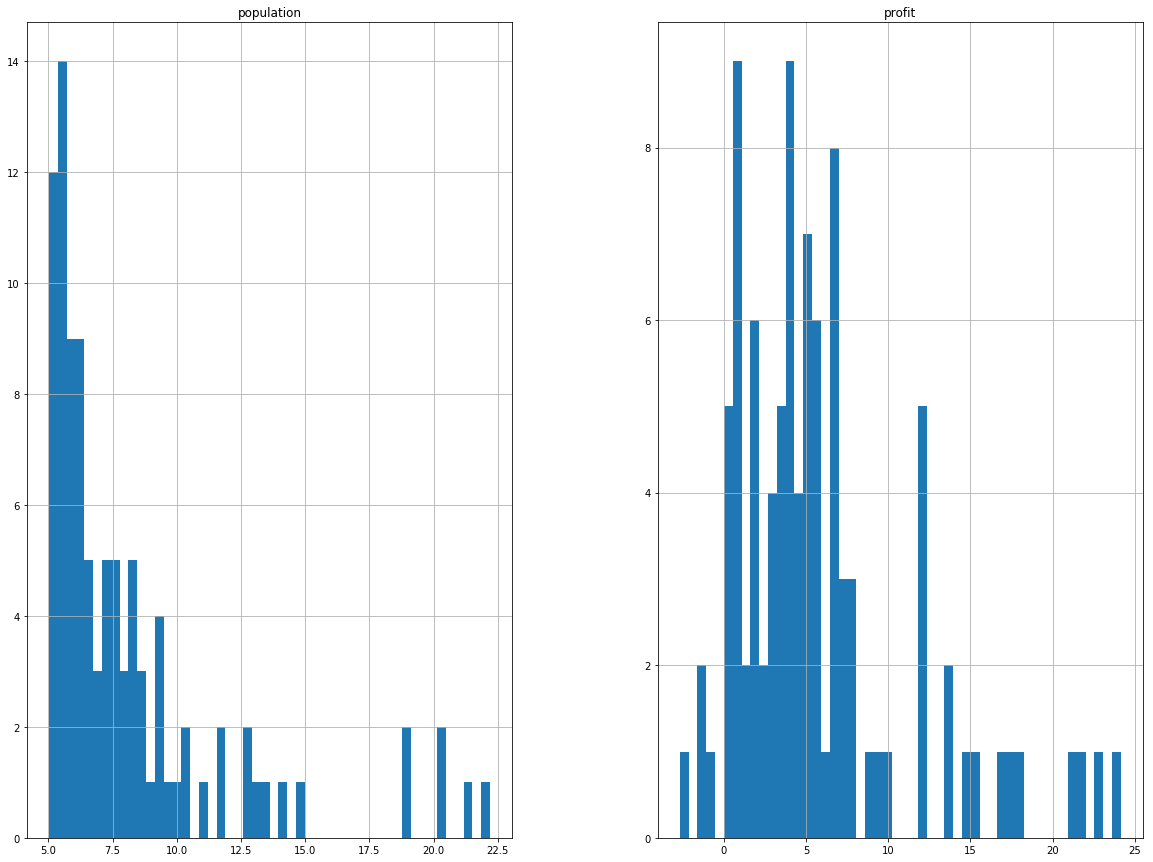

In [5]:
# plot numerical attrs
%matplotlib inline
import matplotlib.pyplot as plt

ex1data1.hist(bins=50, figsize=(20, 15))

\* pd_obj.hist(bins, figsize)

&emsp;&emsp;&emsp;&emsp;1. there are 97 instances, all of the data is float64. 2 attrs. no null values.  polulation mostly falls on 5.0-10.0. profit mostly falls on 0-10 and there are negative values.  the population histogram is tail heavy.  

&emsp;&emsp;**<font color=#000000 size=3>2.4 Create a Test Set
</font>**  

In [6]:
# creata a test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(ex1data1, test_size=0.2, random_state=42)

1. a test set is created.

**<font color=#000000 size=5>3 Discover and Visualize the Data to gain Insights</font>**

&emsp;&emsp;**<font color=#000000 size=3>3.0 Create a Copy</font>**  
&emsp;&emsp;&emsp;&emsp;1. create a copy of the training set.  

In [7]:
# create a copy
ex1data1 = train_set.copy()

  
&emsp;&emsp;*  
&emsp;&emsp;&emsp;&emsp;1. a jupyter notebook is created to record the data exploration.  
&emsp;&emsp;&emsp;&emsp;2.  attr names: population, profit.  
&emsp;&emsp;&emsp;&emsp;&emsp;type: float64.  
&emsp;&emsp;&emsp;&emsp;&emsp;no missing value.  
&emsp;&emsp;&emsp;&emsp;&emsp;no noise.  
&emsp;&emsp;&emsp;&emsp;&emsp;useful fot the task.  
&emsp;&emsp;&emsp;&emsp;&emsp;the population attr is like the right half of the Gaussian distribution and the profit attr is like the Gaussian distribution.  
&emsp;&emsp;&emsp;&emsp;3. the target attr is the profit.  

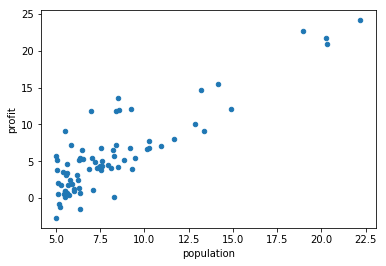

In [8]:
# plot the attrs
ex1data1.plot(kind="scatter", x="population", y="profit")

&emsp;&emsp;**<font color=#000000 size=3>3.1 Visualizing the data</font>**  
&emsp;&emsp;&emsp;&emsp;1. visualize the data. the horizontal axis is the population and the vertical axis is the profit.  

&emsp;&emsp;**<font color=#000000 size=3>3.2 Looking for Correlations</font>**  
&emsp;&emsp;&emsp;&emsp;1. the corr of the attrs.  

In [9]:
# explore the corr
corr_matrix = ex1data1.corr()
corr_matrix["profit"].sort_values(ascending=False)

profit        1.000000
population    0.866811
Name: profit, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4863CFA20>,
      dtype=object)

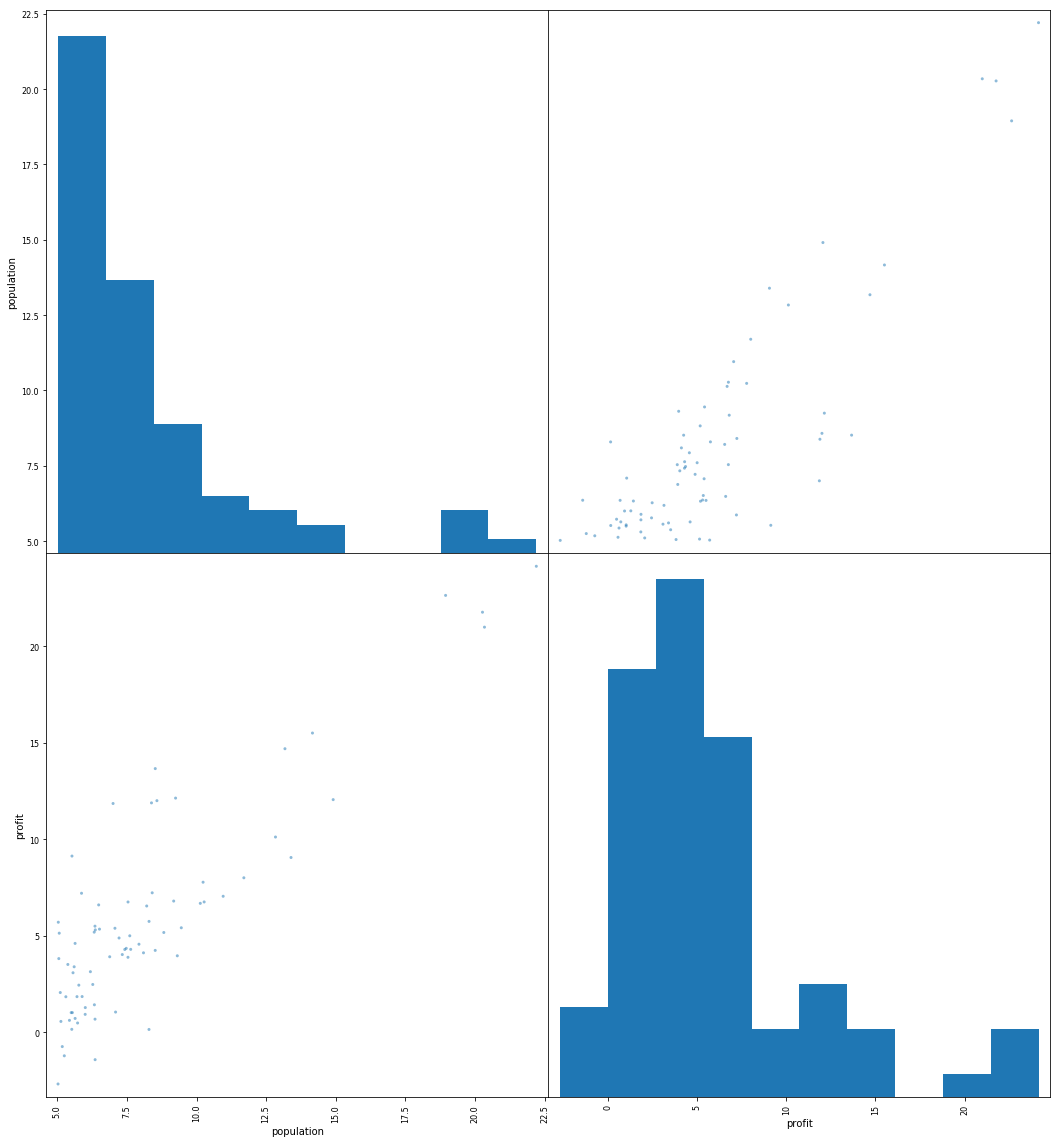

In [10]:
# another way to see the corr
from pandas.plotting import scatter_matrix

attr = ["population", "profit"]
scatter_matrix(ex1data1[attr], figsize=(18, 20))

&emsp;&emsp;&emsp;&emsp;2. no transformation is needed.  
&emsp;&emsp;&emsp;&emsp;3. to manually solve the problem, I will plot data on a coordinate, draw a line to fit as many points as possible. and given data, that is, an x, see the corresponding y value, which is the predicted profit.  

**<font color=#000000 size=3>3.3 Experimenting with Attribute Combinations</font>**

&emsp;&emsp;&emsp;&emsp;1. add an extra attr: profit per person

In [11]:
# add an attr
ex1data1["profit_per_person"] = ex1data1["profit"] / ex1data1["population"]

# explore the corr again
corr_matrix = ex1data1.corr()
corr_matrix["profit"].sort_values(ascending=False)

profit               1.000000
population           0.866811
profit_per_person    0.775286
Name: profit, dtype: float64

In [12]:
# the attr is not useful. thus drop it
ex1data1 = ex1data1.drop("profit_per_person", axis=1)

  
&emsp;&emsp;*  
&emsp;&emsp;&emsp;&emsp;1. documented the exploration.

**<font color=#000000 size=5>4 Prepare the Data for machine Learning Algorithms</font>**

**<font color=#000000 size=3>4.0 revert to a clean training set and seperate the predictors and the labels</font>**  

In [13]:
# seperate the predictors and the labels
ex1data1 = train_set.drop("profit", axis=1)
ex1data1_labels = train_set["profit"].copy()

**<font color=#000000 size=3>4.1 Data Cleaning</font></u>**  
&emsp;&emsp;&emsp;&emsp;1. data cleaning is not needed.  
  
&emsp;&emsp;*  
&emsp;&emsp;&emsp;&emsp;1. feature selection is not needed.  

**<font color=#000000 size=3>4.2 Handling Text and Categorical Attributes</font>**  
**<font color=#000000 size=3>4.3 Custom Transformers</font>**  
&emsp;&emsp;&emsp;&emsp;1. feature engineering is not needed.  

**<font color=#000000 size=3>4.4 Feature Scaling</font>**  
&emsp;&emsp;&emsp;&emsp;1. do normalization here.  

In [14]:
# normalization
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
ex1data1_prepared = min_max_scaler.fit_transform(ex1data1)
ex1data1_prepared

array([[2.99660575e-02],
       [2.97454020e-01],
       [2.75091552e-02],
       [2.05227031e-02],
       [7.72294060e-02],
       [5.03548535e-02],
       [1.61270603e-03],
       [4.08882109e-02],
       [5.31965929e-01],
       [1.27578437e-01],
       [4.87136195e-01],
       [1.31287079e-02],
       [4.74444140e-01],
       [5.67707454e-02],
       [1.95387777e-01],
       [1.20295061e-01],
       [8.91593552e-01],
       [1.69217692e-01],
       [7.79280512e-02],
       [5.70152712e-02],
       [1.85385507e-01],
       [2.06752406e-01],
       [7.75496184e-02],
       [3.45252997e-01],
       [1.18996745e-01],
       [4.70421108e-03],
       [8.10317825e-01],
       [1.49987483e-01],
       [1.96872398e-01],
       [3.13225936e-02],
       [1.15061044e-01],
       [6.00834881e-03],
       [4.54649193e-01],
       [8.49610796e-02],
       [1.46232265e-01],
       [1.42610954e-01],
       [3.05488440e-01],
       [1.78678513e-01],
       [2.03206782e-01],
       [7.26183476e-02],


**<font color=#000000 size=3>4.5 Transformation Pipelines</font>**  

**<font color=#000000 size=5>5 Select and Train a Model</font>**

**<font color=#000000 size=3>5.1 Training and Evaluating on the Training Set</font>**  
&emsp;&emsp;&emsp;&emsp;1. train quick and dirty models.

In [24]:
# train a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(ex1data1_prepared, ex1data1_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
# get some instances
some_data = ex1data1.iloc[:5]
some_labels = ex1data1_labels.iloc[:5]
# transformation
some_data_prepared = min_max_scaler.transform(some_data)

# predict
print(lin_reg.predict(some_data_prepared))
print(list(some_labels))

[2.40257177 8.3179939  2.34823806 2.19373461 3.44778762]
[1.0179, 6.6799, 1.0173, 3.5129, 5.4974]


In [36]:
# evaluate
from sklearn.metrics import mean_squared_error
import numpy as np

# predict using the whole training set
ex1data1_lin_reg_predictions = lin_reg.predict(ex1data1_prepared)

# mse
lin_mse = mean_squared_error(ex1data1_labels, ex1data1_lin_reg_predictions)
# rmse
lin_rmse = np.sqrt(lin_mse)

lin_rmse

2.715036804697891

In [37]:
# train a decision tree model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(ex1data1_prepared, ex1data1_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
# predict
print(tree_reg.predict(some_data_prepared))
print(list(some_labels))

[1.0179 6.6799 1.0173 3.5129 5.4974]
[1.0179, 6.6799, 1.0173, 3.5129, 5.4974]


In [41]:
# predict using the whole training set
ex1data1_tree_reg_predictions = tree_reg.predict(ex1data1_prepared)

# mse
tree_mse = mean_squared_error(ex1data1_labels, ex1data1_tree_reg_predictions)
# rmse
tree_rmse = np.sqrt(tree_mse)

tree_mse

0.0

**<font color=#000000 size=3>5.2 Better Evaluation Using Cross-Validation</font>**  
&emsp;&emsp;&emsp;&emsp;1. use cv to evaluate models.  
&emsp;&emsp;&emsp;&emsp;2. the most significant var for each algor?

In [58]:
# use cv to evaluate the lin_reg model
from sklearn.model_selection import cross_val_score

# scores
lin_reg_scores = cross_val_score(lin_reg, ex1data1_prepared, ex1data1_labels, scoring="neg_mean_squared_error", cv=10)
# rmse
lin_rmse_scores = np.sqrt(-lin_reg_scores)
# print results
print("scores: %s\nmean: %s\nstd: %s" % (lin_rmse_scores, lin_rmse_scores.mean(), lin_rmse_scores.std()))

scores: [1.67011176 3.23192587 2.94950759 3.09598098 1.77396063 1.90247967
 3.5154819  2.94686037 3.48392187 2.1723731 ]
mean: 2.6742603735144437
std: 0.6832647068680541


In [60]:
# use cv to evaluate the tree_reg model

# scores
tree_reg_scores = cross_val_score(tree_reg, ex1data1_prepared, ex1data1_labels, scoring="neg_mean_squared_error", cv=10)
# rmse
tree_rmse_scores = np.sqrt(-tree_reg_scores)
# print results
print("scores: %s\nmean: %s\nstd: %s" % (tree_rmse_scores, tree_rmse_scores.mean(), tree_rmse_scores.std()))

scores: [4.05622031 3.25518503 2.96894964 4.66451299 4.08894314 2.96754655
 5.22997485 3.93526711 6.35675937 4.200733  ]
mean: 4.172409196740098
std: 0.9975375205864476


&emsp;&emsp;&emsp;&emsp;3. it seems the lin model performs well and the tree model 
overfitted.  
&emsp;&emsp;&emsp;&emsp;4. feature selection and engineering are not needed here.  
&emsp;&emsp;&emsp;&emsp;5. have one or two quick iterations. (not done here)  
&emsp;&emsp;&emsp;&emsp;6. (assume that) the lin reg and the tree reg model are the two best and the lin reg works better.

**<font color=#000000 size=5>6 Fine-Tune Your Model</font>**  

**<font color=#000000 size=3>6.2 Randomized Search</font>**  
&emsp;&emsp;&emsp;&emsp;1. fine-tune the model using cv  
&emsp;&emsp;&emsp;&emsp;2. ensemble method are not used here.

**<font color=#000000 size=3>6.5 Evaluate Your System on the Test Set</font>**  
&emsp;&emsp;&emsp;&emsp;1. measure the performance of the best model on the test set to estimate its generalization error.